In [1]:
import pandas as pd

from pycaret.regression import *

In [2]:
df = pd.read_csv('BikeRental.csv')

In [3]:
df

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,dayOfWeek,days
0,1,0,1,0,0,0,1,0.24,0.81,0.0000,16,Sat,0
1,1,0,1,1,0,0,1,0.22,0.80,0.0000,40,Sat,0
2,1,0,1,2,0,0,1,0.22,0.80,0.0000,32,Sat,0
3,1,0,1,3,0,0,1,0.24,0.75,0.0000,13,Sat,0
4,1,0,1,4,0,0,1,0.24,0.75,0.0000,1,Sat,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,2,0.26,0.60,0.1642,119,Mon,723
17375,1,1,12,20,0,1,2,0.26,0.60,0.1642,89,Mon,723
17376,1,1,12,21,0,1,1,0.26,0.60,0.1642,90,Mon,724
17377,1,1,12,22,0,1,1,0.26,0.56,0.1343,61,Mon,724


In [4]:
df.shape

(17379, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   hum         17379 non-null  float64
 9   windspeed   17379 non-null  float64
 10  cnt         17379 non-null  int64  
 11  dayOfWeek   17379 non-null  object 
 12  days        17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


In [6]:
df.describe()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,days
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,0.682721,1.425283,0.496987,0.627229,0.190098,189.463088,361.562576
std,1.106918,0.500008,3.438776,6.914405,0.167165,0.465431,0.639357,0.192556,0.192930,0.122340,181.387599,209.042828
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,0.000000,1.000000,0.340000,0.480000,0.104500,40.000000,181.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,1.000000,1.000000,0.500000,0.630000,0.194000,142.000000,362.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,1.000000,2.000000,0.660000,0.780000,0.253700,281.000000,543.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.850700,977.000000,724.000000


### Setup the Experiment

In [7]:
exp = setup(data=df, target= 'cnt', session_id=123, train_size=0.7, normalize=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(17379, 13)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,25.809200,1700.657500,41.159400,0.947900,0.415400,0.430100
1,CatBoost Regressor,26.471900,1755.066600,41.807800,0.946200,0.456200,0.482700
2,Random Forest,25.529400,1795.267700,42.270300,0.945000,0.347900,0.318100
3,Extra Trees Regressor,25.716700,1818.482800,42.526200,0.944300,0.342800,0.314600
4,Decision Tree,34.671500,3543.709900,59.399200,0.891400,0.452500,0.389300
5,Gradient Boosting Regressor,46.948700,4765.022100,68.969100,0.854000,0.668000,0.921100
6,Extreme Gradient Boosting,47.056700,4786.501900,69.153300,0.853200,0.668000,0.929200
7,AdaBoost Regressor,88.996200,11662.479000,107.978100,0.642000,1.100500,2.900800
8,K Neighbors Regressor,86.539900,15963.625600,126.282800,0.511100,1.043800,2.630700
9,Ridge Regression,103.779600,19285.339400,138.826200,0.409100,1.213000,3.410400


### Linear Regression Model

In [9]:
lrmodel = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,102.7540,18474.4946,135.9209,0.4105,1.2182,3.5959
1,105.7917,19443.9313,139.4415,0.4168,1.2219,3.1965
2,100.7799,18710.6849,136.7870,0.4399,1.2043,3.4434
3,107.7818,20421.5778,142.9041,0.3844,1.2105,3.1142
4,101.9129,17997.2509,134.1538,0.3910,1.2778,4.0169
5,101.9161,18516.0179,136.0736,0.4237,1.1760,3.3389
6,106.1846,20430.8192,142.9364,0.3922,1.1883,3.2183
7,105.7045,21006.9729,144.9378,0.4041,1.2343,3.4991
8,104.7097,19598.9645,139.9963,0.3842,1.2129,3.3444
9,101.0537,18496.3651,136.0013,0.4362,1.1960,3.3982


In [10]:
print(lrmodel)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


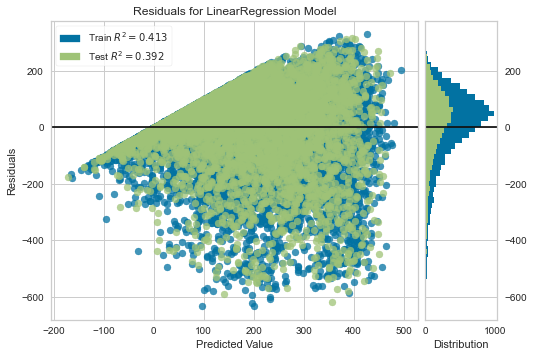

In [11]:
plot_model(lrmodel)

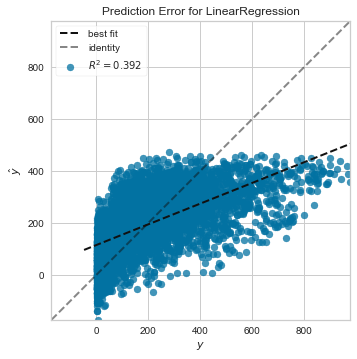

In [12]:
plot_model(lrmodel, plot = 'error')

In [13]:
evaluate_model(lrmodel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [14]:
predict_model(lrmodel)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,106.809,20311.6454,142.5189,0.392,1.2037,3.2977


,hr,temp,hum,windspeed,days,season_1,season_2,season_3,season_4,yr_0,...,weathersit_4,dayOfWeek_Fri,dayOfWeek_Mon,dayOfWeek_Sat,dayOfWeek_Sun,dayOfWeek_Thr,dayOfWeek_Tue,dayOfWeek_Wed,cnt,Label
0,1.077962,1.054335,0.584536,-0.456099,-0.576753,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,295,280.5775
1,0.354813,0.638860,-1.022312,2.228296,-0.174910,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,313,289.6708
2,1.656481,-0.088222,0.740037,-0.821484,1.341570,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,84,336.7178
3,-0.368336,0.015647,-0.607642,1.130506,1.265028,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,276,283.9917
4,-0.657596,0.742729,1.362043,0.031899,0.719670,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,402,183.4217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,1.077962,-1.750123,-1.022312,1.130506,-1.691389,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41,101.7649
5210,0.644072,-0.607566,-0.866811,1.862094,-1.299114,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,130,178.6336
5211,1.222591,0.846597,-1.229647,0.031899,0.729237,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,314,371.1241
5212,0.644072,0.015647,-1.074146,-0.699689,-1.366087,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,165,251.4553
